In [1]:
CMD = "wget https://raw.githubusercontent.com/Diyago/"\
  "GAN-for-tabular-data/master/requirements.txt"

!{CMD}
!pip install -r requirements.txt
!pip install tabgan
!pip install tensoflow

--2022-08-10 02:04:03--  https://raw.githubusercontent.com/Diyago/GAN-for-tabular-data/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184 [text/plain]
Saving to: ‘requirements.txt.1’

requirements.txt.1  100%[===================>]     184  --.-KB/s    in 0s      

2022-08-10 02:04:03 (7.63 MB/s) - ‘requirements.txt.1’ saved [184/184]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scipy-1.4.1-cp37-cp37m-manylinux1_x86_64.whl (26.1 MB)
  Using cached category_encoders-2.1.0-py2.py3-none-any.whl (100 kB)
ERROR: Could not find a version that satisfies the requirement numpy==1.22.0 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0

<i> Restart the run time

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_EEG_features_2022.08.06_without gamma.csv")

In [3]:
dataset.head(5)

,Subjects,Subject Type/Class,Test Type,Gap duration,n0_gap_peak_ms,p1_gap_peak_ms,n1_gap_peak_ms,p2_gap_peak_ms,n2_gap_peak_ms,p3_gap_peak_ms,...,MedianF_Theta,MeanF_Theta,Spectral Edge_Theta,PeakF_Theta,MeanP_Delta,MedianF_Delta,MeanF_Delta,Spectral Edge_Delta,PeakF_Delta,MeanP_Gamma
0,'01_AJW_30_02',Control,Test,20ms,101,147,214,263,366,105,...,3.891054,14.007782,8.560310,4.669262,0.000005,2.334634,8.949416,4.669260,2.334634,6.530000e-07
1,'01_CGO_63_01',Control,Test,20ms,132,155,217,301,383,131,...,4.669264,17.509726,9.727626,4.280158,0.000014,1.945530,10.116732,4.669262,2.723738,4.888000e-06
2,'01_KBJ_45_01',Control,Test,20ms,107,160,221,305,396,128,...,5.447472,20.233462,12.062258,5.836578,0.000064,2.334634,12.840468,6.225684,3.891050,8.334000e-05
3,'02_KCH_26_02',Control,Test,20ms,77,200,233,268,379,166,...,3.112842,13.229570,7.782104,3.891050,0.000198,1.945530,7.782104,5.058368,3.112842,1.680000e-05
4,'03_HMK_49_01',Control,Test,20ms,153,128,224,264,337,147,...,4.280158,12.840468,7.782102,4.669262,0.000018,1.945530,8.949418,4.669262,2.723738,2.378000e-06


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset["Subject Type/Class"]=encoder.fit_transform(dataset["Subject Type/Class"])

In [6]:
dataset.head(5)

,Subjects,Subject Type/Class,Test Type,Gap duration,n0_gap_peak_ms,p1_gap_peak_ms,n1_gap_peak_ms,p2_gap_peak_ms,n2_gap_peak_ms,p3_gap_peak_ms,...,MedianF_Theta,MeanF_Theta,Spectral Edge_Theta,PeakF_Theta,MeanP_Delta,MedianF_Delta,MeanF_Delta,Spectral Edge_Delta,PeakF_Delta,MeanP_Gamma
0,'01_AJW_30_02',0,Test,20ms,101,147,214,263,366,105,...,3.891054,14.007782,8.560310,4.669262,0.000005,2.334634,8.949416,4.669260,2.334634,6.530000e-07
1,'01_CGO_63_01',0,Test,20ms,132,155,217,301,383,131,...,4.669264,17.509726,9.727626,4.280158,0.000014,1.945530,10.116732,4.669262,2.723738,4.888000e-06
2,'01_KBJ_45_01',0,Test,20ms,107,160,221,305,396,128,...,5.447472,20.233462,12.062258,5.836578,0.000064,2.334634,12.840468,6.225684,3.891050,8.334000e-05
3,'02_KCH_26_02',0,Test,20ms,77,200,233,268,379,166,...,3.112842,13.229570,7.782104,3.891050,0.000198,1.945530,7.782104,5.058368,3.112842,1.680000e-05
4,'03_HMK_49_01',0,Test,20ms,153,128,224,264,337,147,...,4.280158,12.840468,7.782102,4.669262,0.000018,1.945530,8.949418,4.669262,2.723738,2.378000e-06


In [7]:
dataset.shape

(330, 131)

In [4]:
X = dataset.iloc[:, 4:]
y = dataset.iloc[:, 1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=31,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[34  5]
 [ 7 20]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        39
           1       0.80      0.74      0.77        27

    accuracy                           0.82        66
   macro avg       0.81      0.81      0.81        66
weighted avg       0.82      0.82      0.82        66

Accurecy:  0.8181818181818182


In [11]:
type(X_test)

pandas.core.frame.DataFrame

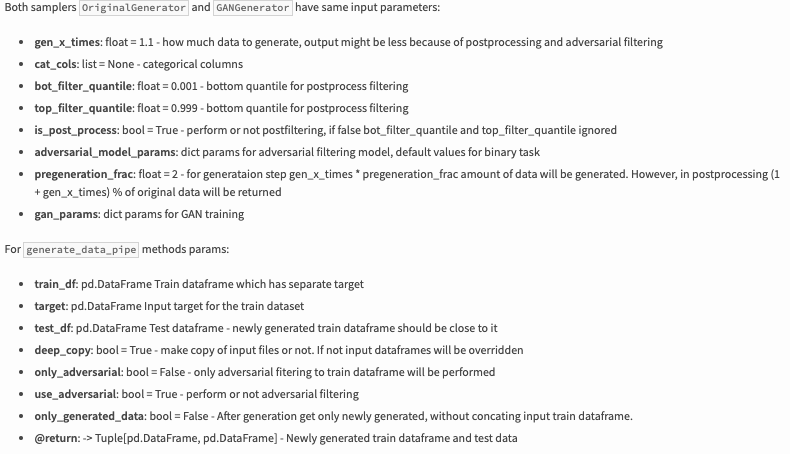

In [12]:
#temp
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
from tabgan.sampler import GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, \
              is_post_process=True,
           adversarial_model_params={
               "metrics": "rmse", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.02, "random_state": \
                42, "n_estimators": 600,
           }, pregeneration_frac=2, only_generated_data=False,\
           gan_params = {"batch_size": 600, "patience": 25, \
          "epochs" : 60,}).generate_data_pipe(pd.DataFrame(X_train), pd.DataFrame(y_train),\
          pd.DataFrame(X_test), deep_copy=True, only_adversarial=False, \
          use_adversarial=True)



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Fitting CTGAN transformers for each column:   0%|          | 0/128 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/60 [00:00<?, ?it/s]

<font color='red'><i> Restart the run time if error occured</i></font>

In [14]:
gen_x

,n0_gap_peak_ms,p1_gap_peak_ms,n1_gap_peak_ms,p2_gap_peak_ms,n2_gap_peak_ms,p3_gap_peak_ms,n0_nogap_peak_ms,p1_nogap_peak_ms,n1_nogap_peak_ms,p2_nogap_peak_ms,...,MedianF_Theta,MeanF_Theta,Spectral Edge_Theta,PeakF_Theta,MeanP_Delta,MedianF_Delta,MeanF_Delta,Spectral Edge_Delta,PeakF_Delta,MeanP_Gamma
0,100,212,275,338,467,140,207,260,334,490,...,4.669262,14.396888,8.560314,5.447472,0.000050,2.334634,9.338522,5.836578,3.891050,1.412000e-05
1,166,206,247,325,447,185,204,236,321,452,...,3.501946,10.116734,6.614788,3.891050,0.000358,1.945530,7.003892,3.891050,3.112842,1.694000e-05
2,70,169,192,269,410,78,169,212,272,369,...,3.891050,11.284048,7.003894,3.891050,0.000744,1.945530,7.392998,3.891050,3.112842,1.856000e-05
3,109,186,228,299,415,147,183,240,301,411,...,3.891050,14.396888,9.338522,4.669262,0.000284,1.945530,8.949418,5.058368,3.501946,9.292000e-06
4,129,177,232,320,428,129,182,231,295,453,...,5.058368,18.287936,10.505836,5.058366,0.000128,1.945530,10.505836,5.447474,3.891050,3.722000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,143,166,223,278,445,95,166,227,280,458,...,3.501948,10.894942,6.614788,3.891052,0.000031,1.945530,7.003894,4.280156,2.723738,4.560000e-07
57,70,184,232,304,382,95,180,232,317,386,...,4.280158,12.840466,7.782104,4.280156,0.000180,2.334634,7.782104,4.669262,2.723738,1.326000e-05
58,138,170,208,255,343,137,155,205,263,368,...,4.669262,17.898832,9.338520,5.447470,0.000042,2.334634,9.727626,5.836580,3.891050,2.282000e-05
59,102,198,232,297,405,132,177,251,296,379,...,3.891052,11.673154,7.392998,3.891052,0.000060,1.945530,8.560310,4.669262,3.501946,1.436000e-06


In [15]:
gen_y

0     1
1     1
2     1
3     0
4     0
     ..
56    0
57    1
58    1
59    0
60    0
Name: Subject Type/Class, Length: 61, dtype: int64

In [17]:
y_pred = xgb_classifier.predict(gen_x)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(gen_y, y_pred))
print(classification_report(gen_y,y_pred))
print("Accurecy: ",accuracy_score(gen_y, y_pred))

[[34  0]
 [ 1 26]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.96      0.98        27

    accuracy                           0.98        61
   macro avg       0.99      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61

Accurecy:  0.9836065573770492


#creating New training set

In [18]:
new_X_train = X_train.append(gen_x)
new_y_train = y_train.append(gen_y)

In [19]:
new_X_train.shape

(325, 127)

In [20]:
new_y_train.shape

(325,)

In [21]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=31,random_state=0)
xgb_classifier.fit(new_X_train,new_y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[35  4]
 [ 7 20]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        39
           1       0.83      0.74      0.78        27

    accuracy                           0.83        66
   macro avg       0.83      0.82      0.82        66
weighted avg       0.83      0.83      0.83        66

Accurecy:  0.8333333333333334


In [22]:
!pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 3.7 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 47 kB 3.1 MB/s 
     |████████████████████████████████| 98 kB 7.7 MB/s 
     |████████████████████████████████| 1.2 MB 12.9 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
     |████████████████████████████████| 11.2 MB 38.8 MB/s 
     |████████████████████████████████| 24.8 MB 1.6 MB/s 
     |████████████████████████████████| 944 kB 58.6 MB/s 
     |████████████████████████████████| 281 kB 68.1 MB/s 
     |████████████████████████████████| 636 kB 75.2 MB/s 
     |████████████████████████████████| 2.5 MB 47.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
  Attempting uninstall: pyyaml
   

In [6]:
from sdv import load_demo

metadata, tables = load_demo(metadata=True)

In [7]:
metadata

Metadata
  root_path: .
  tables: ['users', 'sessions', 'transactions']
  relationships:
    sessions.user_id -> users.user_id
    transactions.session_id -> sessions.session_id

In [9]:
from sklearn.datasets import make_classification, make_regression, make_blobs